# 4.10 - Coding Etiquette & Excel Reporting Part 1.2

## This script contains the following points
### 1. Importing
### 2. Customer profiling
### 3. Visualizations of customer profiles
### 4. Aggregation of customer profiles
### 5. Comparing customer profiles across regions and departments
### 6. Additional analysis
### 7. Exporting

# 1. Importing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a path to the main folder
path = r'C:\Users\nguye\OneDrive\02-2022 Instacart Basket Analysis'

In [3]:
# Import data set
df_high_activity = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))
df_department = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [4]:
# Check the dataframe
df_high_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,number_of_dependants,family_status,income,exists,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High-activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High-activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High-activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High-activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,3,married,40423,both,South,High-activity


In [5]:
df_high_activity.shape

(30964564, 33)

In [6]:
df_department.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# Rename unnamed column to department id
df_department.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [8]:
df_department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
df_department.shape

(21, 2)

# 2. Customer Profiling

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Age

In [10]:
# Check the descriptive statistics of age
df_high_activity['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### Customers will be grouped into the following:
- Young Adult : 18-39
- Middle-Aged : 40-65
- Senior : 65+

In [11]:
# Create the age groups
df_high_activity.loc[(df_high_activity['age'] >= 18) & (df_high_activity['age'] < 40), 'age_group'] = 'Young Adult'
df_high_activity.loc[(df_high_activity['age'] >= 40) & (df_high_activity['age'] < 65), 'age_group'] = 'Middle-Aged'
df_high_activity.loc[df_high_activity['age'] >= 65, 'age_group'] = 'Senior'

In [12]:
# Check age_group counts
df_high_activity['age_group'].value_counts(dropna = False)

Middle-Aged    12103910
Young Adult    10665110
Senior          8195544
Name: age_group, dtype: int64

In [13]:
12103910 + 10665110 + 8195544

30964564

### Income

In [14]:
# Check descriptive statistics
df_high_activity['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

#### The grouping of income will be based on the quartiles as follows:
- Low : < 70,000
- Middle : 70,000 - 120,000
- High : > 120,000

In [15]:
# Create the income groups
df_high_activity.loc[df_high_activity['income'] < 70000, 'income_group'] = 'Low'
df_high_activity.loc[(df_high_activity['income'] >= 70000) & (df_high_activity['income'] < 120000), 'income_group'] = 'Middle'
df_high_activity.loc[df_high_activity['income'] >= 120000, 'income_group'] = 'High'

In [16]:
# Check income group count
df_high_activity['income_group'].value_counts(dropna = False)

Middle    13264248
High       9179783
Low        8520533
Name: income_group, dtype: int64

In [17]:
13264248 + 9179783 + 8520533

30964564

### Number of Dependants

In [18]:
# Check descriptive statistics
df_high_activity['number_of_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependants, dtype: float64

In [19]:
df_high_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  traffic_status          object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spende

In [20]:
# Create a crosstab between number of dependants and family status
crosstab = pd.crosstab(df_high_activity['family_status'], df_high_activity['number_of_dependants'], dropna = False)

In [21]:
crosstab

number_of_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


Because dependents are not defined and could be a child, spouse, or elderly parent, a new column will be created to indicate the family size. 

In [22]:
# Create a family size group
df_high_activity.loc[df_high_activity['number_of_dependants'] == 0, 'household_size'] = 'Single Household'
df_high_activity.loc[(df_high_activity['number_of_dependants'] == 1) | (df_high_activity['number_of_dependants'] == 2), 'household_size'] = 'Medium Household'
df_high_activity.loc[df_high_activity['number_of_dependants'] == 3, 'household_size'] = 'Large Household'

In [23]:
# Check the dependent count
df_high_activity['household_size'].value_counts(dropna = False)

Medium Household    15452367
Large Household      7772516
Single Household     7739681
Name: household_size, dtype: int64

In [24]:
15452367 + 7772516 + 7739681

30964564

In [25]:
# Create a crosstab between dependents and family status
crosstab_fam_dep = pd.crosstab(df_high_activity['family_status'], df_high_activity['household_size'], dropna = False)

In [26]:
crosstab_fam_dep

household_size,Large Household,Medium Household,Single Household
family_status,,,
divorced/widowed,0,0,2645271
living with parents and siblings,488469,992703,0
married,7284047,14459664,0
single,0,0,5094410


### Department

In [27]:
# Create a data dictionary for departments
data_dict = dict(zip(df_department["department_id"], df_department["department"]))

In [28]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [29]:
# Create a new column to convert department_id
df_high_activity['department'] = df_high_activity['department_id'].map(data_dict)

In [30]:
# Check department column
df_high_activity['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [31]:
df_high_activity.shape

(30964564, 37)

# 3. Visualizations of customer profiles

(array([0, 1, 2]),
 [Text(0, 0, 'Middle-Aged'), Text(1, 0, 'Young Adult'), Text(2, 0, 'Senior')])

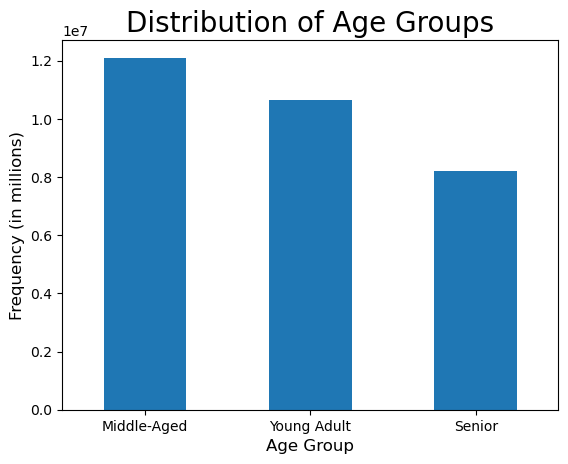

In [32]:
# Create a bar chart for the age_group
bar_age_group = df_high_activity['age_group'].value_counts().plot.bar()

plt.title('Distribution of Age Groups', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Middle'), Text(1, 0, 'High'), Text(2, 0, 'Low')])

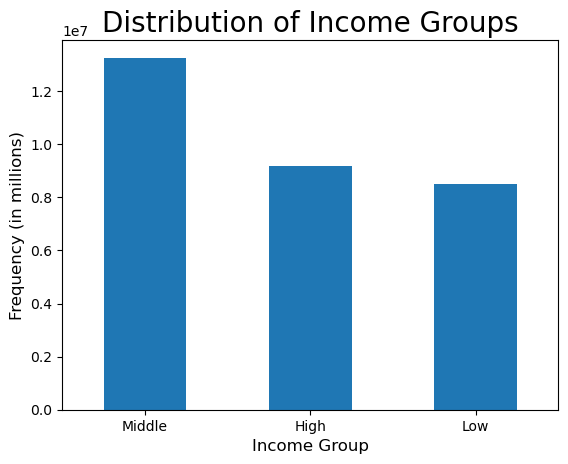

In [33]:
# Create a bar chart for income_group
bar_income_group = df_high_activity['income_group'].value_counts().plot.bar()

plt.title('Distribution of Income Groups', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Income Group', fontsize = 12)
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Medium Household'),
  Text(1, 0, 'Large Household'),
  Text(2, 0, 'Single Household')])

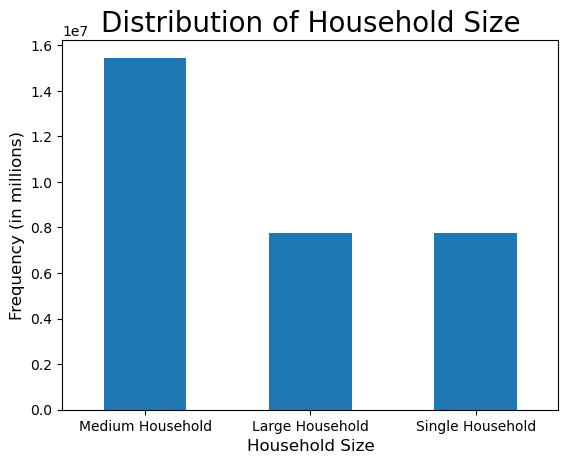

In [34]:
# Create a bar chart for family_size
bar_household_size = df_high_activity['household_size'].value_counts().plot.bar()

plt.title('Distribution of Household Size', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household Size', fontsize = 12)
plt.xticks(rotation = 0)

Text(0.5, 0, 'Department')

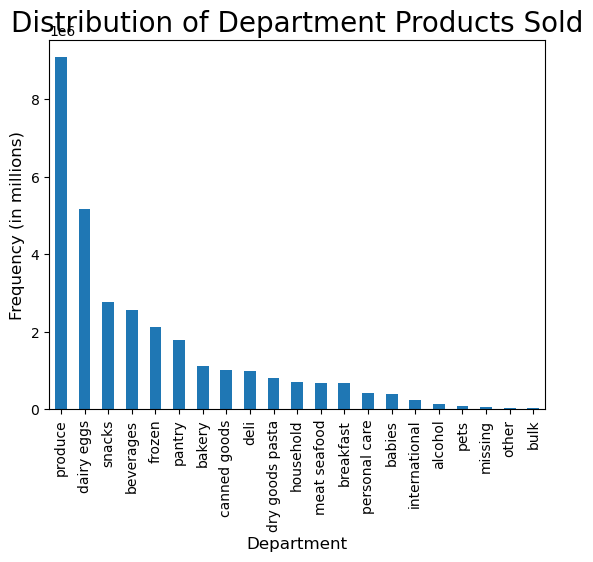

In [35]:
# Create a bar chart for distribution of departments
bar_departments = df_high_activity['department'].value_counts().plot.bar()

plt.title('Distribution of Department Products Sold', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department', fontsize = 12)

# 4. Aggregation of customer profiles

In [36]:
# Age_group aggregation by usage frequency and expenditure
df_high_activity.groupby('age_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                         mean min  max
age_group                             
Middle-Aged          8.354216   1  145
Senior               8.307779   1   99
Young Adult          8.415515   1  109

In [37]:
df_high_activity.groupby('age_group').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Middle-Aged  7.791529  1.0  25.0
Senior       7.796715  1.0  25.0
Young Adult  7.784818  1.0  25.0

In [38]:
# Income_group aggregation by usage frequency and expenditure
df_high_activity.groupby('income_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                          mean min  max
income_group                           
High                  8.484130   1  121
Low                   7.965765   1  137
Middle                8.534431   1  145

In [39]:
df_high_activity.groupby('income_group').agg({'prices' : ['mean', 'min', 'max']})

prices           
                  mean  min   max
income_group                     
High          7.952128  1.0  25.0
Low           7.358224  1.0  25.0
Middle        7.956593  1.0  25.0

In [40]:
# Family_size aggregation by usage frequency and expenditure
df_high_activity.groupby('household_size').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                              mean min  max
household_size                             
Large Household           8.375061   1  145
Medium Household          8.370250   1  114
Single Household          8.336567   1  137

In [41]:
df_high_activity.groupby('household_size').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
household_size                       
Large Household   7.792886  1.0  25.0
Medium Household  7.789957  1.0  25.0
Single Household  7.789550  1.0  25.0

# 5. Comparing customer profiles across regions and departments

In [42]:
# Compare age_group across regions
age_region_crosstab = pd.crosstab(df_high_activity['region'], df_high_activity['age_group'], dropna = False)
age_region_crosstab

age_group,Middle-Aged,Senior,Young Adult
region,,,
Midwest,2874466,1904046,2483001
Northeast,2108141,1484807,1871737
South,3994431,2708461,3608247
West,3126872,2098230,2702125


Text(0.5, 0, 'Regions')

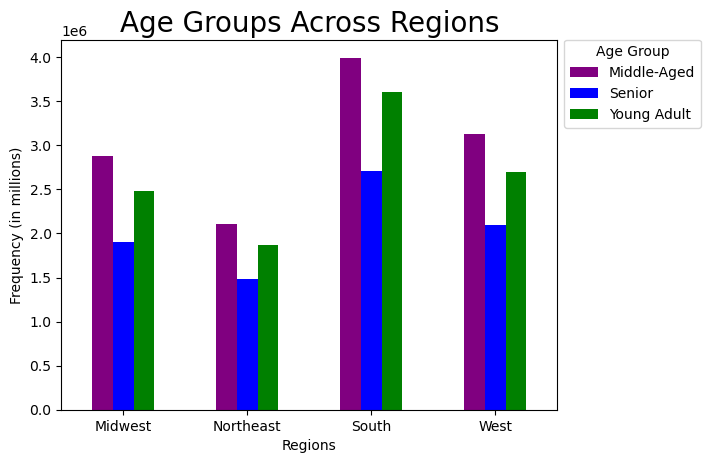

In [43]:
# Create a stacked bar chart for age_group and region
bar_age_region = age_region_crosstab.plot(kind = 'bar', rot = 0, color = ['purple', 'blue', 'green'])
bar_age_region.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Age Groups Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [44]:
# Compare age groups across departments
age_department_crosstab = pd.crosstab(df_high_activity['department'], df_high_activity['age_group'], dropna = False)
age_department_crosstab

age_group,Middle-Aged,Senior,Young Adult
department,,,
alcohol,56278,36693,51656
babies,162732,106204,141456
bakery,438829,295997,386002
beverages,1013708,684020,874173
breakfast,263615,175296,231939
bulk,12882,8945,11624
canned goods,394849,267509,349716
dairy eggs,2015807,1368072,1793303
deli,392790,265199,345845


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

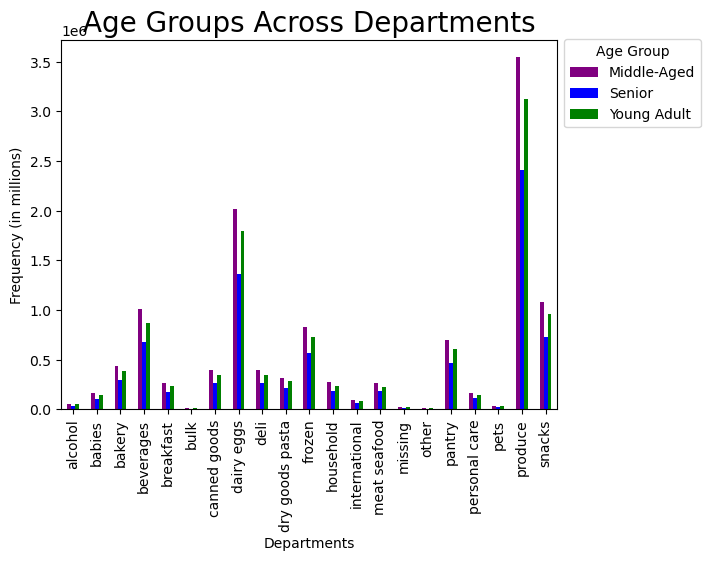

In [45]:
# Create a stacked bar chart for age_group and region
bar_age_department = age_department_crosstab.plot(kind = 'bar', rot = 0, color = ['purple', 'blue', 'green'])
bar_age_department.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Age Groups Across Departments', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

In [46]:
# Compare income groups across regions
income_region_crosstab = pd.crosstab(df_high_activity['region'], df_high_activity['income_group'], dropna = False)
income_region_crosstab

income_group,High,Low,Middle
region,,,
Midwest,2189106,1974266,3098141
Northeast,1628878,1486808,2348999
South,3023493,2849538,4438108
West,2338306,2209921,3379000


Text(0.5, 0, 'Regions')

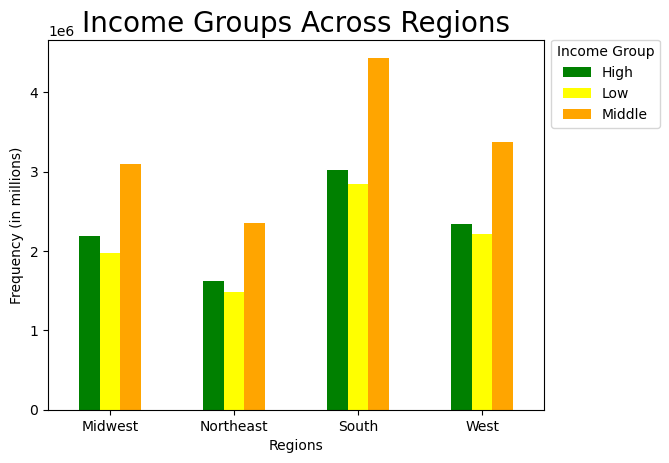

In [47]:
# Create a stacked bar chart for income_group and region
bar_income_region = income_region_crosstab.plot(kind = 'bar', rot = 0, color = ['green', 'yellow', 'orange'])
bar_income_region.legend(title = 'Income Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Income Groups Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [48]:
# Compare income groups across departments
income_department_crosstab = pd.crosstab(df_high_activity['department'], df_high_activity['income_group'], dropna = False)
income_department_crosstab

income_group,High,Low,Middle
department,,,
alcohol,46709,39962,57956
babies,126840,95171,188381
bakery,342744,292666,485418
beverages,730268,804236,1037397
breakfast,192288,204191,274371
bulk,8888,10267,14296
canned goods,314037,248530,449507
dairy eggs,1554817,1363806,2258559
deli,297197,273839,432798


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

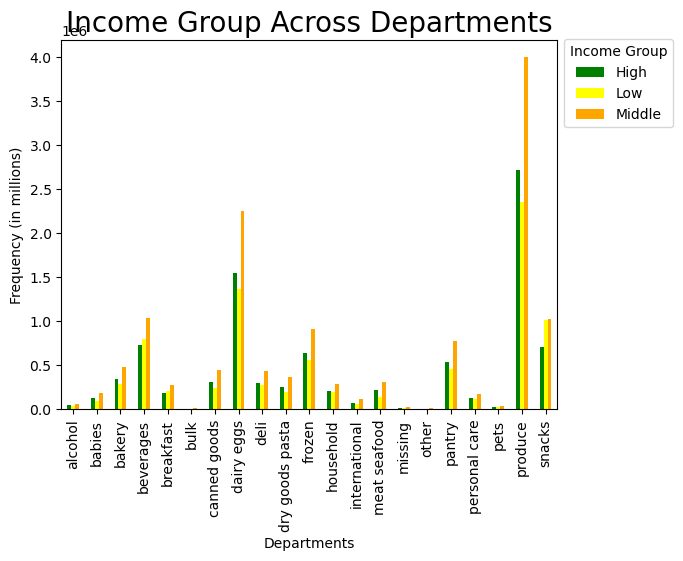

In [49]:
# Create a stacked bar chart for income_group and department
bar_income_department = income_department_crosstab.plot(kind = 'bar', rot = 0, color = ['green', 'yellow', 'orange'])
bar_income_department.legend(title = 'Income Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Income Group Across Departments', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

In [50]:
# Compare family size across regions
family_region_crosstab = pd.crosstab(df_high_activity['region'], df_high_activity['household_size'], dropna = False)
family_region_crosstab

household_size,Large Household,Medium Household,Single Household
region,,,
Midwest,1787286,3651411,1822816
Northeast,1381233,2728970,1354482
South,2585864,5143342,2581933
West,2018133,3928644,1980450


Text(0.5, 0, 'Regions')

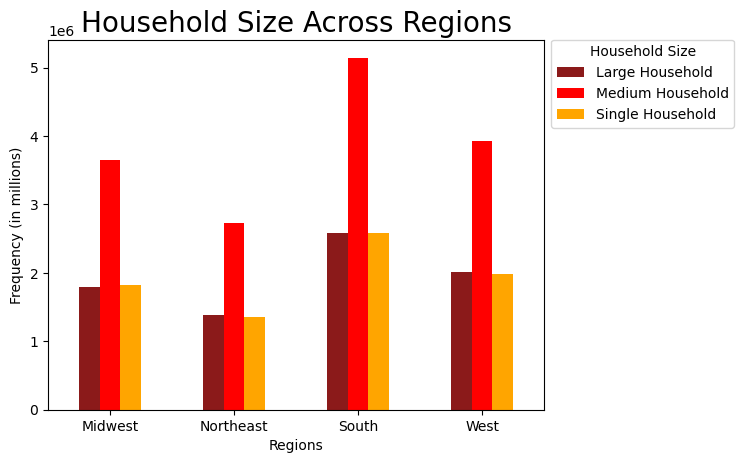

In [51]:
# Create a stacked bar chart for family size and region
bar_family_region = family_region_crosstab.plot(kind = 'bar', rot = 0, color = ['#8B1A1A', 'red', 'orange'])
bar_family_region.legend(title = 'Household Size', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Household Size Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [52]:
# Compare family size across departments
family_department_crosstab = pd.crosstab(df_high_activity['department'], df_high_activity['household_size'], dropna = False)
family_department_crosstab

household_size,Large Household,Medium Household,Single Household
department,,,
alcohol,37333,70467,36827
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167322,337096,166432
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

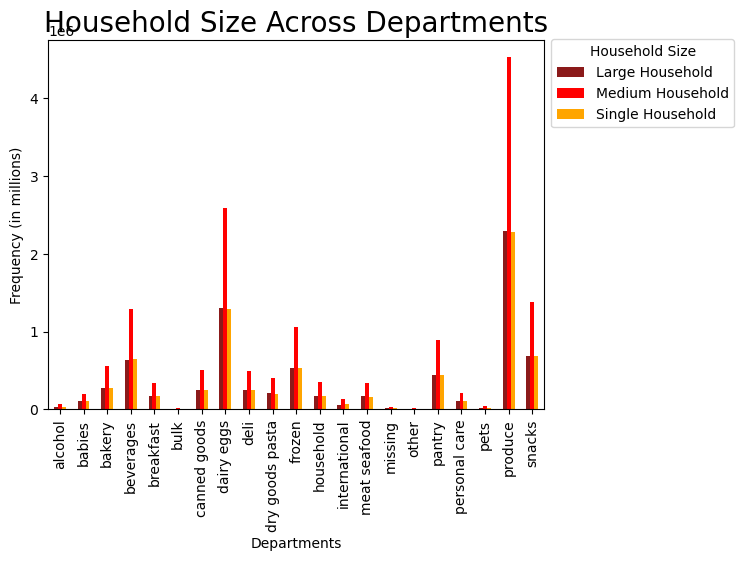

In [53]:
# Create a stacked bar chart for family size and department
bar_family_department = family_department_crosstab.plot(kind = 'bar', rot = 0, color = ['#8B1A1A', 'red', 'orange'])
bar_family_department.legend(title = 'Household Size', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Household Size Across Departments', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

### When comparing these customer profiles throughout the regions, the distribution shows consistency throughout each profile, with the South having the highest amount in each profile. Additionally, when comparing across departments, produce has the highest amount of orders throughout each profile. 

# 6. Additional Analysis

### The sales team want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

(array([0, 1, 2]),
 [Text(0, 0, 'Most orders'),
  Text(1, 0, 'Average orders'),
  Text(2, 0, 'Least orders')])

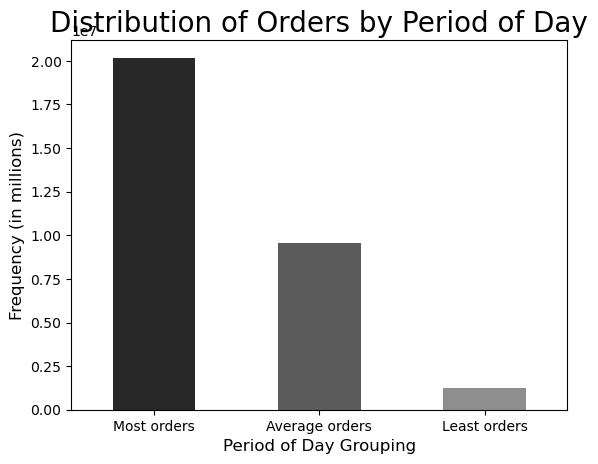

In [54]:
# Create a bar chart showing the busiest period of day
bar_busy_period = df_high_activity['busiest_period_of_day'].value_counts().plot.bar(color = ['#282828', '#5B5B5B', '#8E8E8E'])

plt.title('Distribution of Orders by Period of Day', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Period of Day Grouping', fontsize = 12)
plt.xticks(rotation = 0)

### Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

(array([0, 1, 2]),
 [Text(0, 0, 'Mid range product'),
  Text(1, 0, 'Low range product'),
  Text(2, 0, 'High range product')])

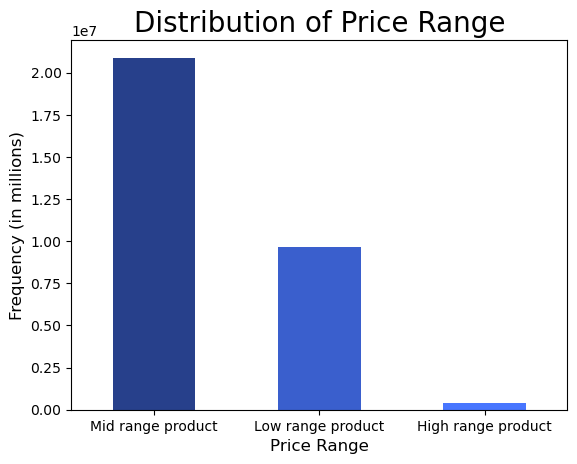

In [55]:
# Create a bar chart showing the distribution by price range
bar_price_range = df_high_activity['price_range_loc'].value_counts().plot.bar(color = ['#27408B', '#3A5FCD', '#4876FF'])

plt.title('Distribution of Price Range', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Price Range', fontsize = 12)
plt.xticks(rotation = 0)

### Are there certain types of products that are more popular than others? The only marketing and sales teams want to know which departments have the highest frequency of product orders.

In [56]:
# Show frequency count of department
df_high_activity['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

### Are there differences in ordering habits based on a customer’s loyalty status?

In [57]:
# Compare loyalty status and dow
loyalty_day_crosstab = pd.crosstab(df_high_activity['orders_day_of_week'], df_high_activity['loyalty_flag'], dropna = False)
loyalty_day_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

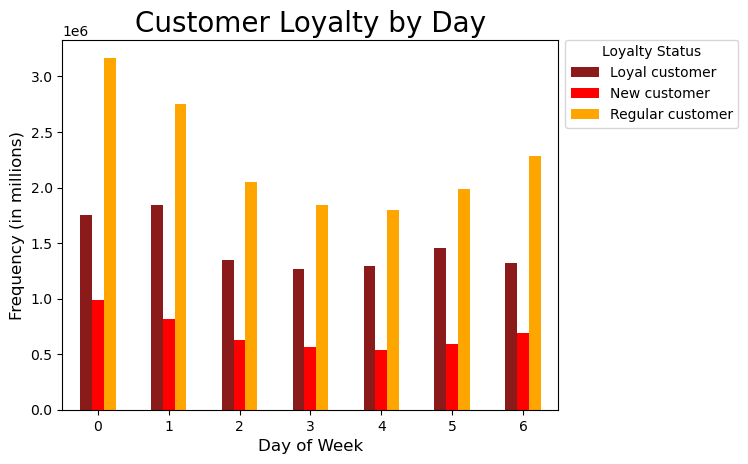

In [58]:
# Create a stacked bar chart for loyalty_flag and dow
bar_loyalty_day = loyalty_day_crosstab.plot(kind = 'bar', rot = 0, color = ['#8B1A1A', 'red', 'orange'])
bar_loyalty_day.legend(title = 'Loyalty Status', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Customer Loyalty by Day', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of Week', fontsize = 12)
plt.xticks(rotation = 0)

In [59]:
# Compare loyalty status and period of day
loyalty_hour_crosstab = pd.crosstab(df_high_activity['loyalty_flag'], df_high_activity['busiest_period_of_day'], dropna = False)
loyalty_hour_crosstab

busiest_period_of_day,Average orders,Least orders,Most orders
loyalty_flag,,,
Loyal customer,3164776,405718,6713599
New customer,1480601,192436,3130658
Regular customer,4905433,634744,10336599


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

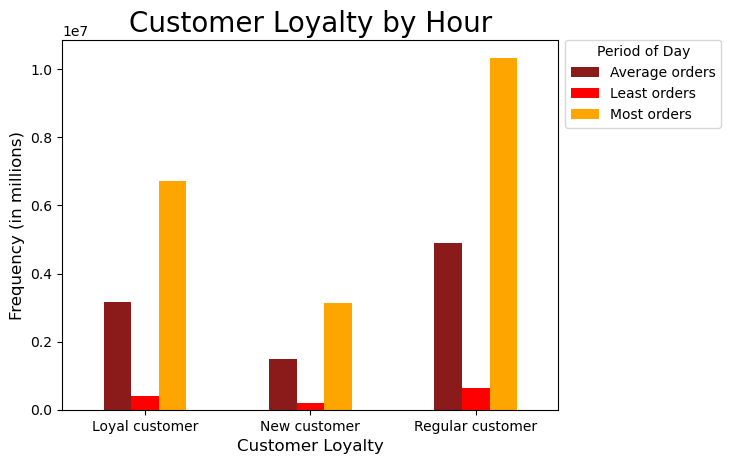

In [60]:
# Create a stacked bar chart for loyalty_flag and busiest_period_of_day
bar_loyalty_hour = loyalty_hour_crosstab.plot(kind = 'bar', rot = 0, color = ['#8B1A1A', 'red', 'orange'])
bar_loyalty_hour.legend(title = 'Period of Day', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Customer Loyalty by Hour', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Customer Loyalty', fontsize = 12)
plt.xticks(rotation = 0)

In [61]:
# Compare loyalty customers across departments
loyalty_department_crosstab = pd.crosstab(df_high_activity['department'], df_high_activity['loyalty_flag'], dropna = False)
loyalty_department_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

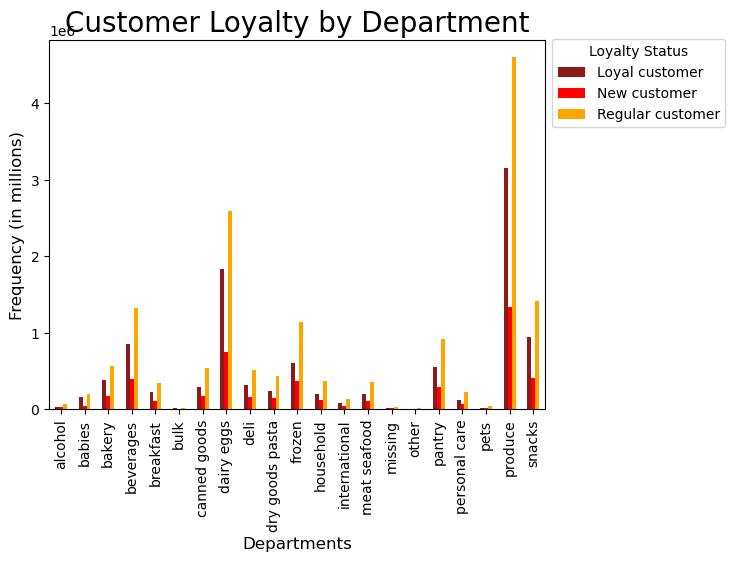

In [62]:
# Create a stacked bar chart for loyalty_flag and departments
bar_loyalty_department = loyalty_department_crosstab.plot(kind = 'bar', rot = 0, color = ['#8B1A1A', 'red', 'orange'])
bar_loyalty_department.legend(title = 'Loyalty Status', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Customer Loyalty by Department', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Departments', fontsize = 12)
plt.xticks(rotation = 90)

### Are there differences in ordering habits based on a customer’s region?

In [63]:
# Compare orders by region and dow
region_dow_crosstab = pd.crosstab(df_high_activity['orders_day_of_week'], df_high_activity['region'], dropna = False)
region_dow_crosstab

region,Midwest,Northeast,South,West
orders_day_of_week,,,,
0,1390189,1043698,1955352,1519371
1,1263655,954332,1808348,1385351
2,947370,713159,1340387,1023790
3,855316,649305,1229002,935912
4,851501,637781,1205497,930215
5,943396,716128,1342849,1031356
6,1010086,750282,1429704,1101232


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

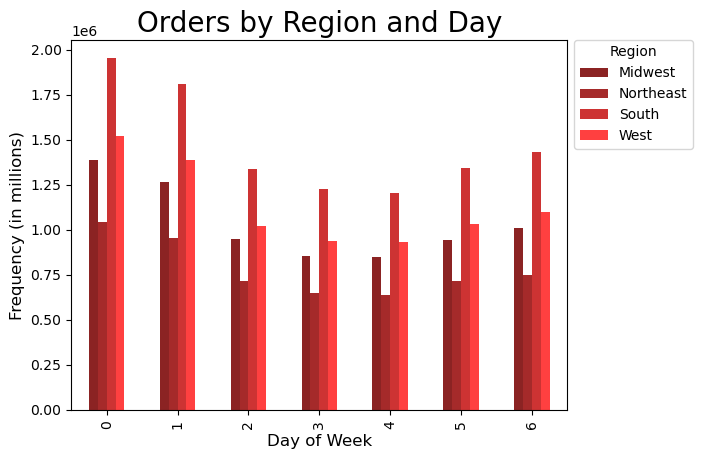

In [64]:
# Create a stacked bar chart for region and dow
bar_region_dow = region_dow_crosstab.plot(kind = 'bar', rot = 0, color = ['#8B2323', '#A52A2A', '#CD3333', '#FF4040'])
bar_region_dow.legend(title = 'Region', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Orders by Region and Day', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of Week', fontsize = 12)
plt.xticks(rotation = 90)

In [65]:
# Compare orders by region and hour group
region_hour_crosstab = pd.crosstab(df_high_activity['busiest_period_of_day'], df_high_activity['region'], dropna = False)
region_hour_crosstab

region,Midwest,Northeast,South,West
busiest_period_of_day,,,,
Average orders,2250470,1682688,3190331,2427321
Least orders,285815,222249,414122,310712
Most orders,4725228,3559748,6706686,5189194


(array([0, 1, 2]),
 [Text(0, 0, 'Average orders'),
  Text(1, 0, 'Least orders'),
  Text(2, 0, 'Most orders')])

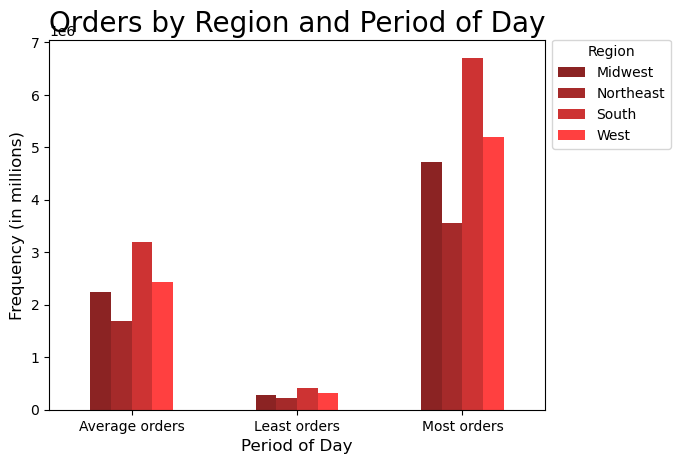

In [66]:
# Create a stacked bar chart for region and hour group
bar_region_hour = region_hour_crosstab.plot(kind = 'bar', rot = 0, color = ['#8B2323', '#A52A2A', '#CD3333', '#FF4040'])
bar_region_hour.legend(title = 'Region', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Orders by Region and Period of Day', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Period of Day', fontsize = 12)
plt.xticks(rotation = 0)

In [67]:
# Compare orders by region and department
region_department_crosstab = pd.crosstab(df_high_activity['department'], df_high_activity['region'], dropna = False)
region_department_crosstab

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

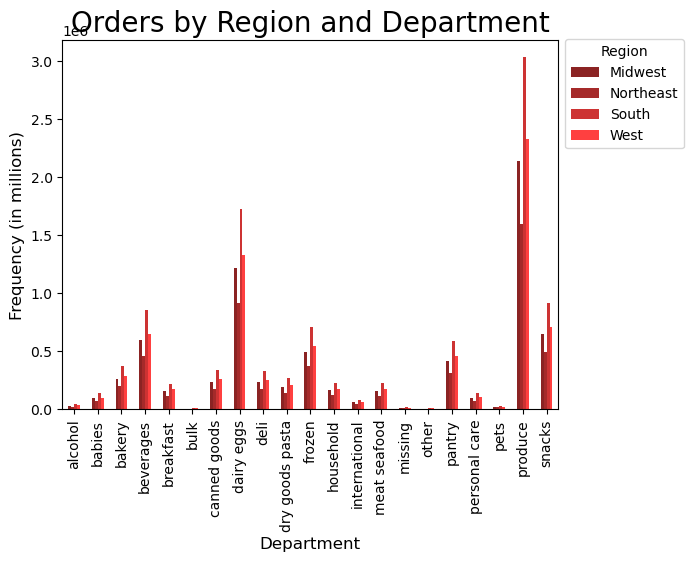

In [68]:
# Create a stacked bar chart for region and department
bar_region_department = region_department_crosstab.plot(kind = 'bar', rot = 0, color = ['#8B2323', '#A52A2A', '#CD3333', '#FF4040'])
bar_region_department.legend(title = 'Region', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Orders by Region and Department', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department', fontsize = 12)
plt.xticks(rotation = 90)

### Is there a connection between age and family status in terms of ordering habits?

In [69]:
# Compare orders by age group and family status
age_family_crosstab = pd.crosstab(df_high_activity['age_group'], df_high_activity['family_status'], dropna = False)
age_family_crosstab

family_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Middle-Aged,623313,0,9046762,2433835
Senior,2021958,0,6173586,0
Young Adult,0,1481172,6523363,2660575


Text(0.5, 0, 'Age Group')

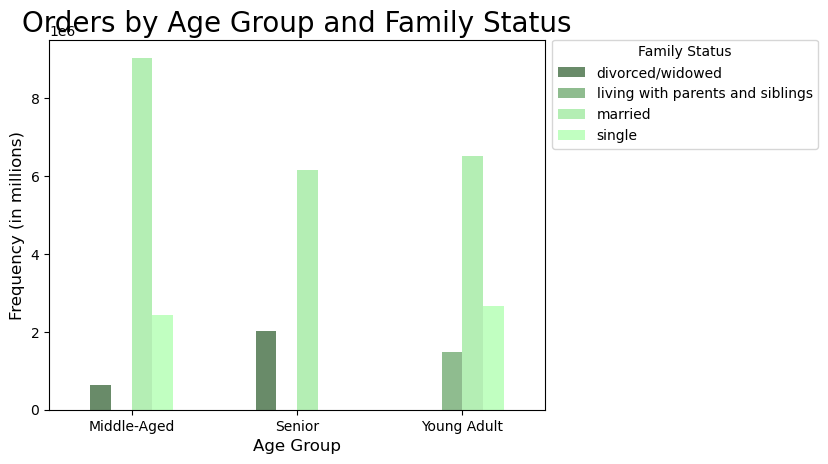

In [70]:
# Create a stacked bar chart for age and family status
bar_age_family = age_family_crosstab.plot(kind = 'bar', rot = 0, color = ['#698B69', '#8FBC8F', '#B4EEB4', '#C1FFC1'])
bar_age_family.legend(title = 'Family Status', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Orders by Age Group and Family Status', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)

### What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

(array([0, 1, 2, 3]),
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'divorced/widowed'),
  Text(3, 0, 'living with parents and siblings')])

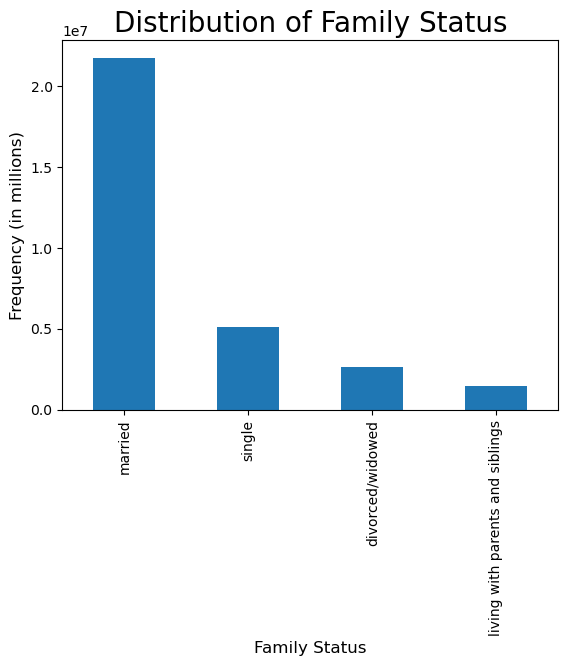

In [71]:
# Create a bar chart for family status
bar_family_status = df_high_activity['family_status'].value_counts().plot.bar()

plt.title('Distribution of Family Status', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Family Status', fontsize = 12)
plt.xticks(rotation = 90)

### What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

# 7. Exporting

In [74]:
# Exporting dataframes
df_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_prod_ords_cust.pkl'))
df_department.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_department.pkl'))

In [76]:
# Exporting charts
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_age_group.png'))
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_income_group.png'))
bar_household_size.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_household_size.png'))
bar_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_department_products.png'))
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'))
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_department.png'))
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'))
bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_department.png'))
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_region.png'))
bar_family_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_department.png'))
bar_busy_period.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busy_period.png'))
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range.png'))
bar_loyalty_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_day.png'))
bar_loyalty_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_hour.png'))
bar_loyalty_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_department.png'))
bar_region_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_dow.png'))
bar_region_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_hour.png'))
bar_region_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_department.png'))
bar_age_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_family.png'))
bar_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'))